# KASSIM Al-Mouyasser DUT2 STID S4 (Domaines d'application)

# L'analyse statistique sur les inégalités socio-économiques en Ile-de-France en 2018 

## Problématique : **Les inégalités sociales peuvent-elles être expliquées par les inégalités économiques en terme de revenu médian ?**

## 1. La régression linéaire multiple

### 1.1. Importation des bibliothèques nécessaires

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
import statsmodels.api as sm

### 1.2. Importation du jeu de données

In [ ]:
data_communes = pd.read_excel(".../Inegalites2018_IDFCommunes.xlsx")
data_communes

,Code géographique,Région,Département,Latitude,Longitude,Libellé géographique,Médiane (€),Part Pop 15 ans ou plus non scol. Sans diplôme ou CEP,"Part Pop 15 ans ou plus non scol. BEPC, brevet des collèges, DNB",Part Pop 15 ans ou plus non scol. CAP-BEP ou équiv.,...,"Part Actifs 15-64 ans Artisans, Comm., Chefs entr.","Part Actifs 15-64 ans Cadres, Prof. intel. sup.",Part Actifs 15-64 ans Prof. intermédiaires,Part Actifs 15-64 ans Employés,Part Actifs 15-64 ans Ouvriers,Taux d'immigration,CSP dominante,Niveau d'éducation,Niveau d'immigration,Typologie du revenu
0,95633,11,95,"49,00049673","2,486429562",Vaudherland,22980,0.254,0.090,0.388,...,0.100,0.000,0.200,0.400,0.300,0.081,Employés et ouvriers,"Instruit (Sans diplôme, CAP-BEP)",Faible,Faible
1,77009,11,77,"48,18127559","2,55657978",Arville,27820,0.192,0.040,0.313,...,0.000,0.111,0.444,0.333,0.111,0.000,Catégorie moyenne,"Instruit (Sans diplôme, CAP-BEP)",Faible,Modéré
2,77134,11,77,"48,64252262","3,28982875",Courchamp,23400,0.132,0.113,0.245,...,0.000,0.273,0.091,0.545,0.091,0.048,Employés et ouvriers,"Instruit (Sans diplôme, CAP-BEP)",Faible,Faible
3,77271,11,77,"48,18279297","2,621229709",Maisoncelles-en-Gâtinais,21690,0.290,0.060,0.290,...,0.000,0.000,0.556,0.222,0.222,0.082,Catégorie moyenne,"Instruit (Sans diplôme, CAP-BEP)",Faible,Faible
4,95110,11,95,"49,13955373","1,943521002",Brignancourt,28900,0.117,0.019,0.195,...,0.000,0.375,0.375,0.188,0.063,0.048,Catégorie moyenne,Bien instruit (Enseignement sup.),Faible,Modéré
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266,95304,11,95,"49,15849636","2,177680345",Hédouville,34290,0.051,0.051,0.194,...,0.056,0.389,0.389,0.167,0.000,0.043,Cadres et ingénieurs,Bien instruit (Enseignement sup.),Faible,Elevé
1267,95308,11,95,"49,10489391","2,127220469",Hérouville-en-Vexin,30150,0.126,0.042,0.251,...,0.061,0.242,0.364,0.197,0.121,0.038,Catégorie moyenne,"Instruit (Sans diplôme, CAP-BEP)",Faible,Modéré
1268,95447,11,95,"49,17378477","1,980231533",Neuilly-en-Vexin,27530,0.147,0.064,0.192,...,0.150,0.300,0.200,0.300,0.050,0.027,Cadres et ingénieurs,"Instruit (Sans diplôme, CAP-BEP)",Faible,Modéré
1269,95459,11,95,"49,15953932","1,856434093",Nucourt,26580,0.212,0.040,0.280,...,0.030,0.269,0.284,0.207,0.180,0.035,Catégorie moyenne,"Instruit (Sans diplôme, CAP-BEP)",Faible,Modéré


In [ ]:
data_communes.describe()

,Code géographique,Région,Département,Médiane (€),Part Pop 15 ans ou plus non scol. Sans diplôme ou CEP,"Part Pop 15 ans ou plus non scol. BEPC, brevet des collèges, DNB",Part Pop 15 ans ou plus non scol. CAP-BEP ou équiv.,"Part Pop 15 ans ou plus non scol. Bac, brevet pro. ou équiv.",Part Pop 15 ans ou plus Enseignement sup,Taux d'emploi 15-64 ans,Taux de chômage 15-64 ans,Part Actifs 15-64 ans Agriculteurs exploitants,"Part Actifs 15-64 ans Artisans, Comm., Chefs entr.","Part Actifs 15-64 ans Cadres, Prof. intel. sup.",Part Actifs 15-64 ans Prof. intermédiaires,Part Actifs 15-64 ans Employés,Part Actifs 15-64 ans Ouvriers,Taux d'immigration
count,1271.000000,1271.0,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000,1271.000000
mean,83643.225020,11.0,83.363493,27240.723839,0.172394,0.052496,0.237803,0.184611,0.352704,0.701684,0.095419,0.009984,0.065446,0.223908,0.292685,0.255790,0.152197,0.099887
std,7735.385933,0.0,7.740682,5556.563724,0.063444,0.014261,0.066017,0.028493,0.122409,0.051300,0.034169,0.025945,0.037608,0.124742,0.068310,0.075395,0.076627,0.070454
min,75101.000000,11.0,75.000000,10580.000000,0.038000,0.010000,0.037000,0.084000,0.093000,0.373000,0.012000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000
25%,77313.500000,11.0,77.000000,24020.000000,0.128000,0.043000,0.198000,0.168000,0.264000,0.678000,0.073000,0.000000,0.042000,0.135000,0.252000,0.206000,0.096000,0.052000
50%,78311.000000,11.0,78.000000,26850.000000,0.164000,0.052000,0.242000,0.185000,0.334000,0.708000,0.089000,0.000000,0.058000,0.202000,0.291000,0.256000,0.143000,0.074000
75%,91646.500000,11.0,91.000000,29980.000000,0.207000,0.060000,0.285000,0.201000,0.417000,0.734000,0.110000,0.006500,0.083000,0.292000,0.331000,0.304500,0.200000,0.127500
max,95690.000000,11.0,95.000000,52670.000000,0.495000,0.135000,0.414000,0.282000,0.743000,0.831000,0.253000,0.250000,0.283000,0.667000,0.577000,0.545000,0.503000,0.460000


### 1.3. Sélectionner les variables explicatives et la variable à expliquer

In [ ]:
communes_socio = data_communes.copy()

In [ ]:
data_communes.columns

Index(['Code géographique', 'Région', 'Département', 'Latitude', 'Longitude',
       'Libellé géographique', 'Médiane (€)',
       'Part Pop 15 ans ou plus non scol. Sans diplôme ou CEP ',
       'Part Pop 15 ans ou plus non scol. BEPC, brevet des collèges, DNB ',
       'Part Pop 15 ans ou plus non scol. CAP-BEP ou équiv. ',
       'Part Pop 15 ans ou plus non scol. Bac, brevet pro. ou équiv. ',
       'Part Pop 15 ans ou plus Enseignement sup', 'Taux d'emploi 15-64 ans',
       'Taux de chômage 15-64 ans',
       'Part Actifs 15-64 ans Agriculteurs exploitants  ',
       'Part Actifs 15-64 ans Artisans, Comm., Chefs entr.  ',
       'Part Actifs 15-64 ans Cadres, Prof. intel. sup.  ',
       'Part Actifs 15-64 ans Prof. intermédiaires  ',
       'Part Actifs 15-64 ans Employés  ', 'Part Actifs 15-64 ans Ouvriers  ',
       'Taux d'immigration', 'CSP dominante', 'Niveau d'éducation',
       'Niveau d'immigration', 'Typologie du revenu'],
      dtype='object')

In [ ]:
#Variables explicatives et variable à expliquer
X = data_communes[[
       'Part Pop 15 ans ou plus non scol. Sans diplôme ou CEP ',
       'Part Pop 15 ans ou plus non scol. BEPC, brevet des collèges, DNB ',
       'Part Pop 15 ans ou plus non scol. CAP-BEP ou équiv. ',
       'Part Pop 15 ans ou plus non scol. Bac, brevet pro. ou équiv. ',
       'Part Pop 15 ans ou plus Enseignement sup', "Taux d'emploi 15-64 ans",
       'Taux de chômage 15-64 ans',
       'Part Actifs 15-64 ans Agriculteurs exploitants  ',
       'Part Actifs 15-64 ans Artisans, Comm., Chefs entr.  ',
       'Part Actifs 15-64 ans Cadres, Prof. intel. sup.  ',
       'Part Actifs 15-64 ans Prof. intermédiaires  ',
       'Part Actifs 15-64 ans Employés  ', 'Part Actifs 15-64 ans Ouvriers  ',
       "Taux d'immigration"]]

Y = data_communes[['Médiane (€)']]

### 1.4. Matrice de corrélations

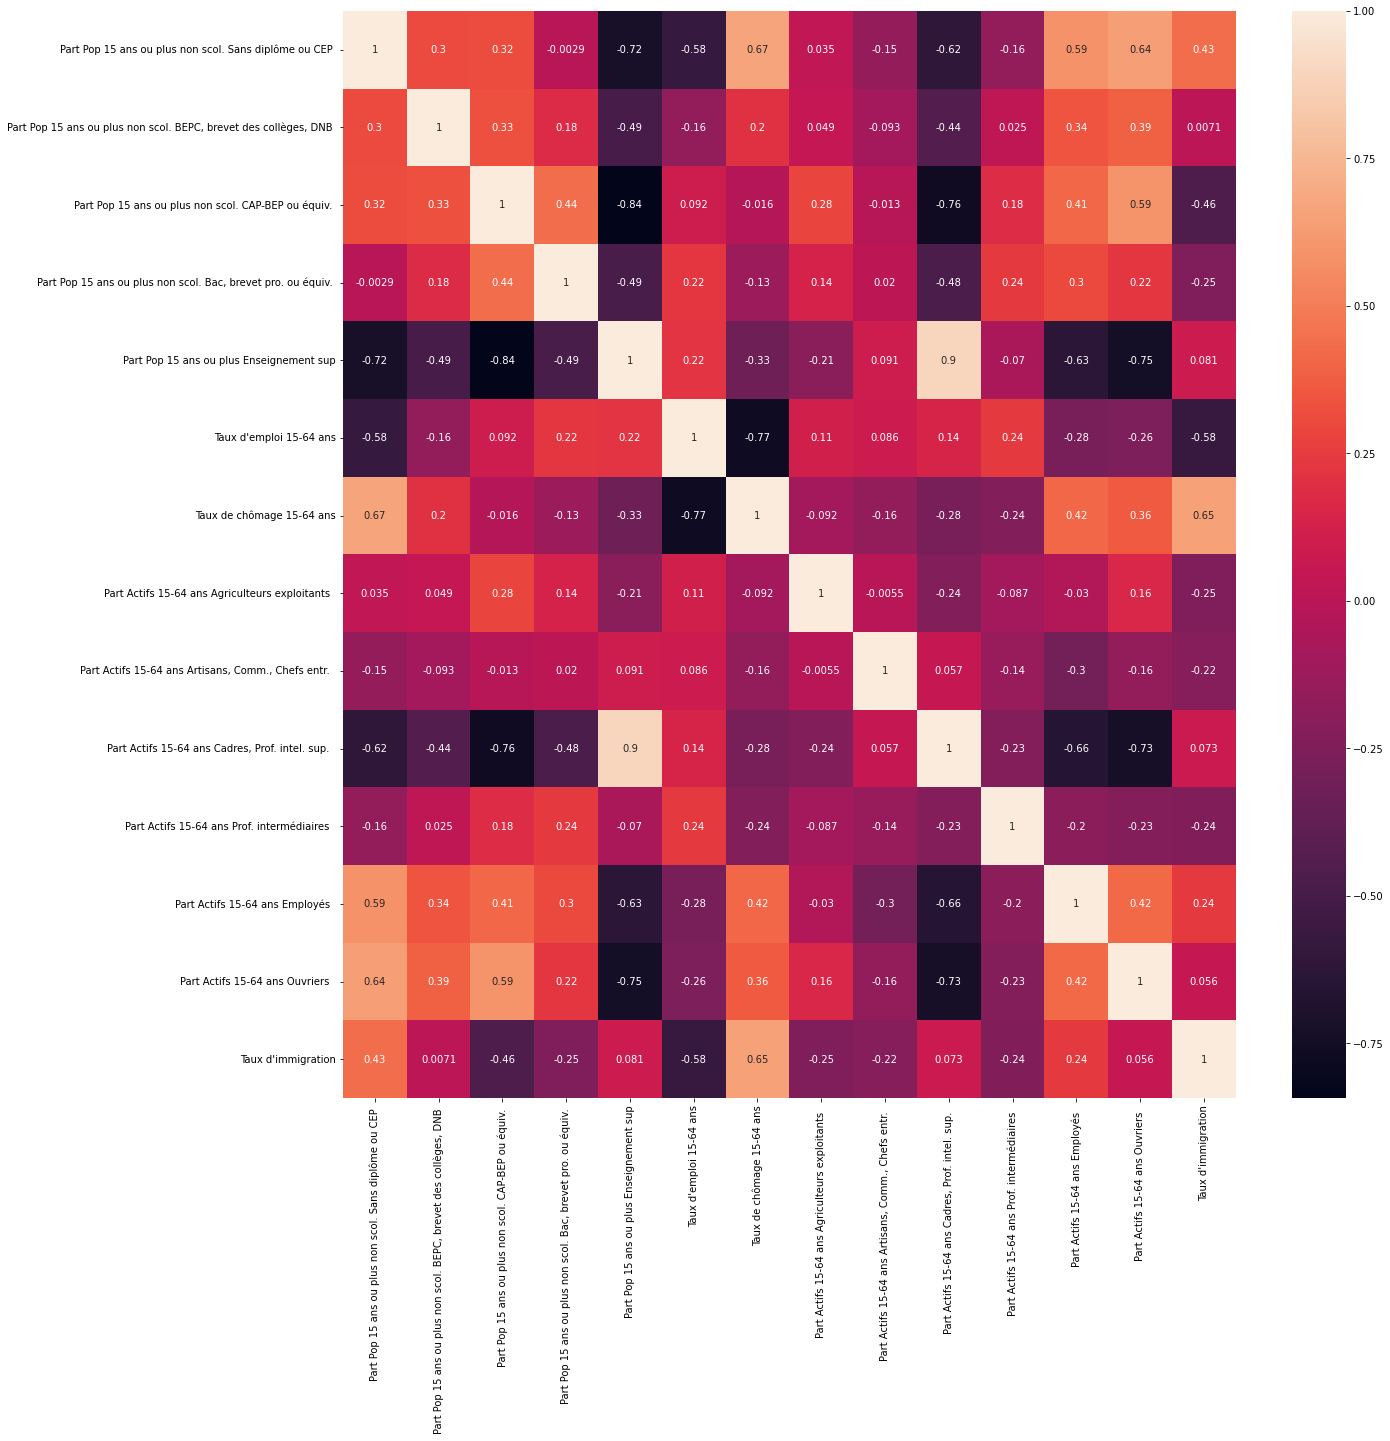

In [ ]:
#Vérifier la corrélation des variables explicatives
corr_communesocio = X.corr(method='pearson')

plt.figure(figsize=(20,20))
sns.heatmap(corr_communesocio, annot=True)
plt.show()

### 1.5. Faire le modèle de régression

In [ ]:
reg = LinearRegression()
reg.fit(X,Y)

LinearRegression()

### 1.6. Déterminer les coefficients de la régression

In [ ]:
variables_socioeco = pd.DataFrame({'Variables explicatives':X.columns,'Coefficients':reg.coef_[0]})
variables_socioeco.append({'Variables explicatives':'Constante','Coefficients':reg.intercept_[0]},ignore_index=True).set_index('Variables explicatives')

,Coefficients
Variables explicatives,
Part Pop 15 ans ou plus non scol. Sans diplôme ou CEP,-41759.771674
"Part Pop 15 ans ou plus non scol. BEPC, brevet des collèges, DNB",-43819.563281
Part Pop 15 ans ou plus non scol. CAP-BEP ou équiv.,-40847.608491
"Part Pop 15 ans ou plus non scol. Bac, brevet pro. ou équiv.",-44548.371435
Part Pop 15 ans ou plus Enseignement sup,-13397.403633
Taux d'emploi 15-64 ans,-11572.512721
Taux de chômage 15-64 ans,-34407.799695
Part Actifs 15-64 ans Agriculteurs exploitants,33728.406813
"Part Actifs 15-64 ans Artisans, Comm., Chefs entr.",42347.332836


### 1.7. Les prédictions des revenus à l'aide des variables explicatives

In [ ]:
y_pred = pd.DataFrame(reg.predict(X),dtype='float').set_axis(['Prédictions (Revenu médian)'],axis=1)

In [ ]:
communes = pd.concat([data_communes,y_pred],axis=1)
communes

,Code géographique,Région,Département,Latitude,Longitude,Libellé géographique,Médiane (€),Part Pop 15 ans ou plus non scol. Sans diplôme ou CEP,"Part Pop 15 ans ou plus non scol. BEPC, brevet des collèges, DNB",Part Pop 15 ans ou plus non scol. CAP-BEP ou équiv.,...,"Part Actifs 15-64 ans Cadres, Prof. intel. sup.",Part Actifs 15-64 ans Prof. intermédiaires,Part Actifs 15-64 ans Employés,Part Actifs 15-64 ans Ouvriers,Taux d'immigration,CSP dominante,Niveau d'éducation,Niveau d'immigration,Typologie du revenu,Prédictions (Revenu médian)
0,95633,11,95,"49,00049673","2,486429562",Vaudherland,22980,0.254,0.090,0.388,...,0.000,0.200,0.400,0.300,0.081,Employés et ouvriers,"Instruit (Sans diplôme, CAP-BEP)",Faible,Faible,17918.079233
1,77009,11,77,"48,18127559","2,55657978",Arville,27820,0.192,0.040,0.313,...,0.111,0.444,0.333,0.111,0.000,Catégorie moyenne,"Instruit (Sans diplôme, CAP-BEP)",Faible,Modéré,26207.423198
2,77134,11,77,"48,64252262","3,28982875",Courchamp,23400,0.132,0.113,0.245,...,0.273,0.091,0.545,0.091,0.048,Employés et ouvriers,"Instruit (Sans diplôme, CAP-BEP)",Faible,Faible,25216.971380
3,77271,11,77,"48,18279297","2,621229709",Maisoncelles-en-Gâtinais,21690,0.290,0.060,0.290,...,0.000,0.556,0.222,0.222,0.082,Catégorie moyenne,"Instruit (Sans diplôme, CAP-BEP)",Faible,Faible,20980.022987
4,95110,11,95,"49,13955373","1,943521002",Brignancourt,28900,0.117,0.019,0.195,...,0.375,0.375,0.188,0.063,0.048,Catégorie moyenne,Bien instruit (Enseignement sup.),Faible,Modéré,33610.305340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1266,95304,11,95,"49,15849636","2,177680345",Hédouville,34290,0.051,0.051,0.194,...,0.389,0.389,0.167,0.000,0.043,Cadres et ingénieurs,Bien instruit (Enseignement sup.),Faible,Elevé,35641.924063
1267,95308,11,95,"49,10489391","2,127220469",Hérouville-en-Vexin,30150,0.126,0.042,0.251,...,0.242,0.364,0.197,0.121,0.038,Catégorie moyenne,"Instruit (Sans diplôme, CAP-BEP)",Faible,Modéré,30451.839059
1268,95447,11,95,"49,17378477","1,980231533",Neuilly-en-Vexin,27530,0.147,0.064,0.192,...,0.300,0.200,0.300,0.050,0.027,Cadres et ingénieurs,"Instruit (Sans diplôme, CAP-BEP)",Faible,Modéré,29693.422161
1269,95459,11,95,"49,15953932","1,856434093",Nucourt,26580,0.212,0.040,0.280,...,0.269,0.284,0.207,0.180,0.035,Catégorie moyenne,"Instruit (Sans diplôme, CAP-BEP)",Faible,Modéré,27874.781586


### 1.8. L'ecart-type des erreurs du revenu médian

In [ ]:
#Erreur-type des erreurs
print('Erreur-type du revenu médian = ',np.sqrt(mean_squared_error(Y,y_pred)))

Erreur-type du revenu médian =  2083.1877038196


Le revenu annuel par ménage médian varie en moyenne de **2083 €** par rapport aux prédictions du niveau de vie annuel par foyer fiscal.

### 1.9. Le coefficient de détermination

In [ ]:
print('Coefficient de détermination R2 = ', round(r2_score(Y,y_pred),3))

Coefficient de détermination R2 =  0.859


Cela signifie que **85,9% de la variance du revenu annuel par ménage médian des communes d'Ile-de-France est expliquée par les variables explicatives**, donc j'en déduis que le revenu médian est bien influencé par les indicateurs sociaux (situation sociale, professionnelle, niveau d'éducation, mode de transport) et **14,1% de la variance du revenu médian est expliquée par des résidus (qui sont aléatoires)**. Mon constat est bien vérifié et admissible.

### 1.10. Graphique entre les valeurs observées et les valeurs prédites

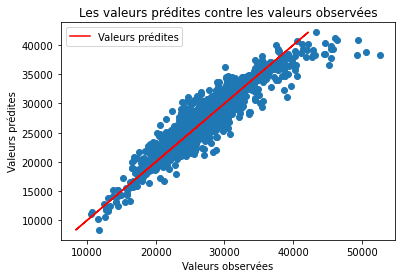

In [ ]:
plt.scatter(Y,y_pred)
plt.title('Les valeurs prédites contre les valeurs observées')
plt.plot(y_pred,y_pred,c='red',label='Valeurs prédites')
plt.xlabel('Valeurs observées')
plt.ylabel('Valeurs prédites')
plt.legend()
plt.show()

In [ ]:
communes.to_excel(".../PrédictionsRevenu2018IDF.xlsx")